# Test TicTacTrip

In [1]:
import pandas as pd
from datetime import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## data understanding

### load data

In [3]:
cities = pd.read_csv("cities.csv")
providers = pd.read_csv("providers.csv")
stations = pd.read_csv("stations.csv")
ticket_data = pd.read_csv("ticket_data.csv")

### display data

In [4]:
cities

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN
...,...,...,...,...,...,...
8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN
8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN
8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN
8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN


In [4]:
providers

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
...,...,...,...,...,...,...,...,...,...,...
222,8384,10,16,thalys,Thalys,True,True,False,True,train
223,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
224,8387,30,NaN,vatry,Vatry,NaN,NaN,NaN,NaN,bus
225,8388,40,NaN,beauval,Beauval,NaN,NaN,NaN,NaN,bus


In [5]:
stations

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737
...,...,...,...,...
11030,11032,Porto Avda De Los Aliados,41.146922,-8.611122
11031,11033,Rom Ciampino Flughafen Piazzale Leonardo da Vinci,41.804102,12.597110
11032,11034,Sants,41.379892,2.139462
11033,11035,Vozilici D66,45.157136,14.164140


In [6]:
ticket_data

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562


## data processing

### first stats

In [5]:
# max min and mean of price and duration
max_price = ticket_data['price_in_cents'].max()
min_price = ticket_data['price_in_cents'].min()
mean_price = ticket_data['price_in_cents'].mean()
ticket_data['duration(hour)'] = (pd.to_datetime(ticket_data['arrival_ts']) - pd.to_datetime(ticket_data['departure_ts'])).dt.total_seconds() / 3600

max_duration = ticket_data['duration(hour)'].max()
min_duration = ticket_data['duration(hour)'].min()
mean_duration = ticket_data['duration(hour)'].mean()

In [6]:
print(f"price : max = {max_price} / min = {min_price} / mean = {round(mean_price, 3)} \nduration : max = {max_duration} / min = {round(min_duration, 3)} / mean = {round(mean_duration, 3)}")

price : max = 38550 / min = 300 / mean = 4382.711 
duration : max = 492.85 / min = 0.333 / mean = 7.077


In [7]:
# join the transport type on each ticket
ticket_data = ticket_data.merge(providers[["id", 'transport_type']], left_on='company', right_on='id').drop(columns=['id_y']).rename(columns={'id_x': 'id'})

In [8]:
# df to compute the distance of each traject
traject_distance = ticket_data.merge(cities, left_on='o_city', right_on='id')\
                                .merge(cities, left_on= 'd_city', right_on='id')\
                                [['id_x', 'o_city', 'd_city','latitude_x','longitude_x', 'latitude_y','longitude_y']]\
                                .rename(columns={'id_x': 'id', 'latitude_x': 'o_latitude', 'latitude_y': 'd_latitude',
                                                 'longitude_x': 'o_longitude', 'longitude_y': 'd_longitude'}, inplace=False)

In [9]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the Earth's surface given their latitude and longitude
    in decimal degrees.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    radius_earth = 6371  # Radius of Earth in kilometers
    distance = radius_earth * c

    return distance

# distance calculation and merge with the principle df
traject_distance['distance(km)'] = traject_distance.apply(lambda row: haversine(row['o_latitude'], row['o_longitude'], row['d_latitude'], row['d_longitude']), axis=1)
ticket_data = ticket_data.merge(traject_distance[['id', 'distance(km)']], on='id')

In [10]:
def assign_group(value):
    if value <=200:
        return '0-200km'
    elif 200<value<=800:
        return '201-800km'
    elif 800<value<=2000:
        return '801-2000km'

# group creation for several distance categories
ticket_data['group_distance'] = ticket_data['distance(km)'].apply(assign_group)

In [11]:
# mean price by transport type and group distance
mean_price_type = ticket_data.pivot_table(index = 'group_distance', columns = 'transport_type', values ='price_in_cents', aggfunc = 'mean')
mean_price_type

transport_type,bus,carpooling,train
group_distance,,,
0-200km,2182.830918,1177.352385,3487.900779
201-800km,3494.850022,3218.064310,9124.779489
801-2000km,6949.950045,8626.545455,15463.746130


In [12]:
# mean duration by transport type and group distance
mean_duration_type = ticket_data.pivot_table(index = 'group_distance', columns = 'transport_type', values ='duration(hour)', aggfunc = 'mean')
mean_duration_type

transport_type,bus,carpooling,train
group_distance,,,
0-200km,10.232515,1.952040,4.419400
201-800km,15.074797,4.763131,7.677651
801-2000km,27.536119,13.100233,12.158617


### Others stats

In [13]:
#join to add companies name to the principle df
ticket_data = ticket_data.merge(providers[["id", 'name']], left_on='company', right_on='id').drop(columns=['id_y']).rename(columns={'id_x': 'id'})

In [14]:
# correlation on each ticket between price and duration
corr = ticket_data['price_in_cents'].corr(ticket_data['duration(hour)'])
print(f'Correlation on each ticket between price and duration = {round(corr, 3)}')

Correlation on each ticket between price and duration = 0.159


In [15]:
# mean price for each company 
ticket_data.groupby(['name'])['price_in_cents'].mean().sort_values()

name
globtour            2450.000000
bbc                 2742.171907
isilines            3075.794648
nationalExpress     3218.976190
deinbus             3265.555556
ouibus              3333.039045
flixbus             3759.361631
studentAgency       3868.800000
eurolines           4747.602759
eurolinesUK         5033.000000
navette             6377.941176
train               6892.843413
corailintercite     6909.927041
navettedeVatry      6975.000000
vatry               7062.500000
tgv                 9099.485787
coraillunea        10369.285714
thalys             14909.183417
expressbus         16395.000000
eurostar           16684.656189
Name: price_in_cents, dtype: float64

In [16]:
# mean duration for each company 
ticket_data.groupby(['name'])['duration(hour)'].mean().sort_values()

name
bbc                 4.110647
thalys              5.663107
train               7.107144
tgv                 7.311887
navettedeVatry      7.875000
eurostar            8.157007
navette             8.305784
corailintercite     8.485059
nationalExpress     9.888823
vatry              11.171875
studentAgency      11.333333
deinbus            12.703704
ouibus             14.247294
flixbus            14.874041
coraillunea        15.754762
globtour           15.933333
isilines           19.321562
eurolinesUK        19.638889
eurolines          26.037126
expressbus         47.500000
Name: duration(hour), dtype: float64

In [17]:
# proportion of each companies in all tickets
count_providers = ticket_data.groupby(['name'])['id'].count().sort_values()
count_providers

name
globtour               1
expressbus             1
eurolinesUK            3
studentAgency          5
deinbus                9
coraillunea           14
navettedeVatry        16
vatry                 16
navette              170
nationalExpress      252
eurostar             509
eurolines            725
thalys               796
isilines            1607
corailintercite     2193
ouibus              3560
train               6763
flixbus             7433
tgv                 8654
bbc                41441
Name: id, dtype: int64

In [18]:
# proportion of each transport type in all tickets
count_transport_type = ticket_data.groupby(['transport_type'])['id'].count().sort_values()
count_transport_type

transport_type
bus           13798
train         18929
carpooling    41441
Name: id, dtype: int64

## Viz

### Count

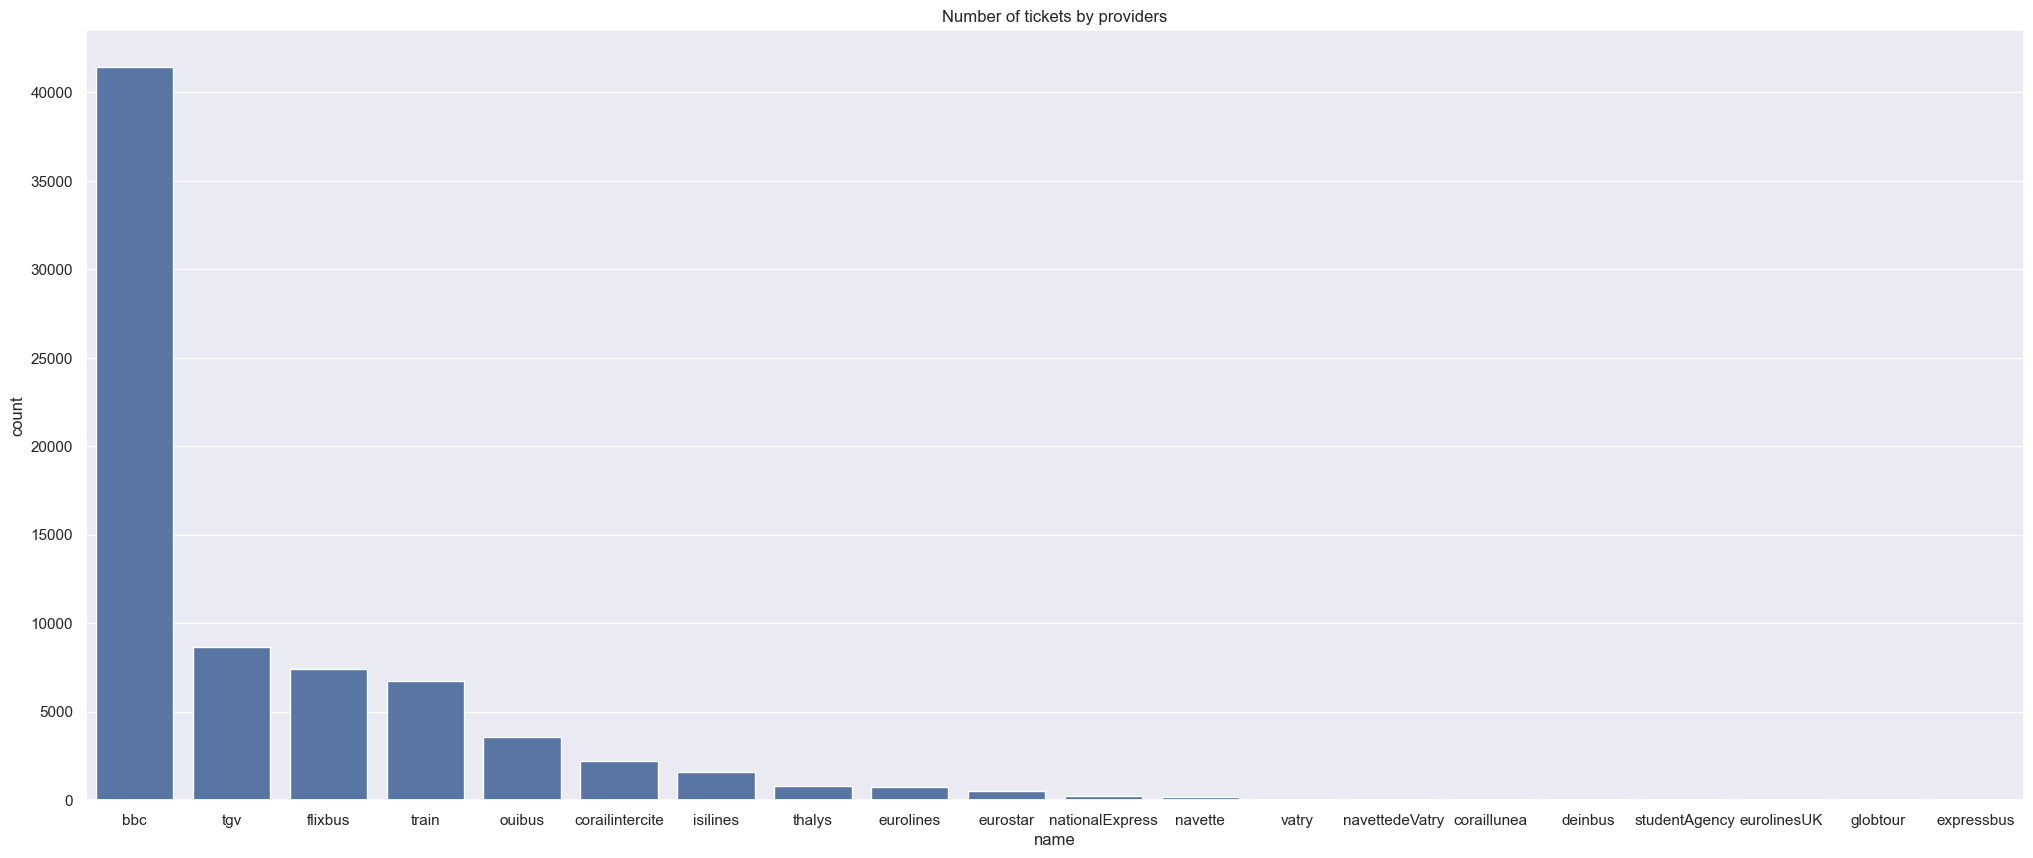

In [21]:
sns.set_theme()
plt.figure(figsize = (25,10))
plt.title('Number of tickets by providers')
sns.countplot(data=ticket_data, x='name', order = ticket_data['name'].value_counts().index)
plt.show()

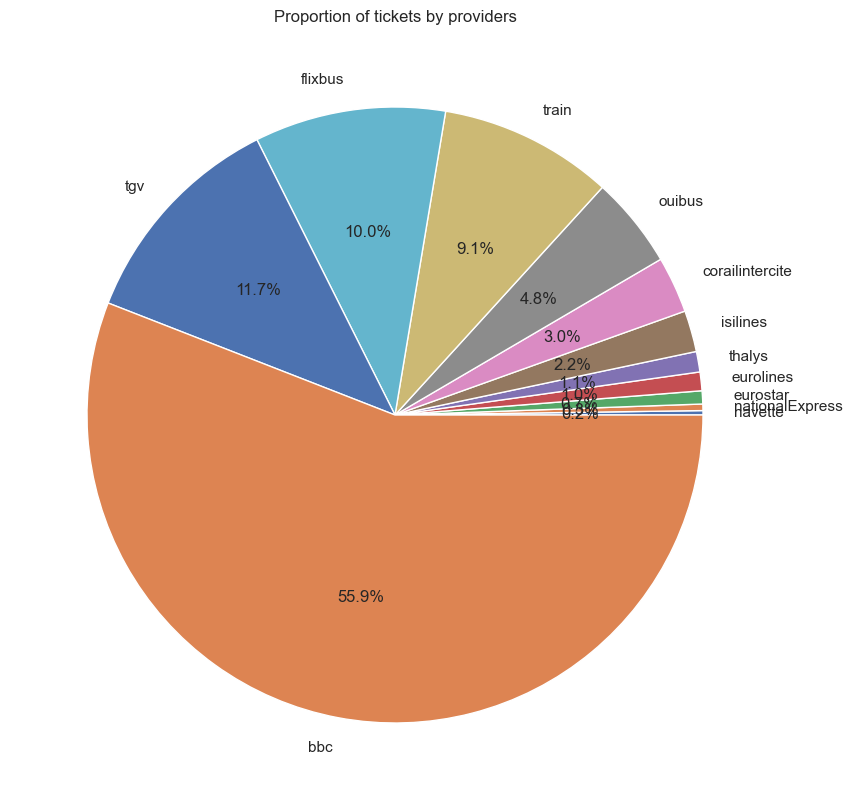

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize = (25,10))
plt.title('Proportion of tickets by providers')
plt.pie(count_providers.where(lambda x : x>20).dropna(), labels= count_providers.where(lambda x : x>20).dropna().index, autopct='%1.1f%%')
plt.show()

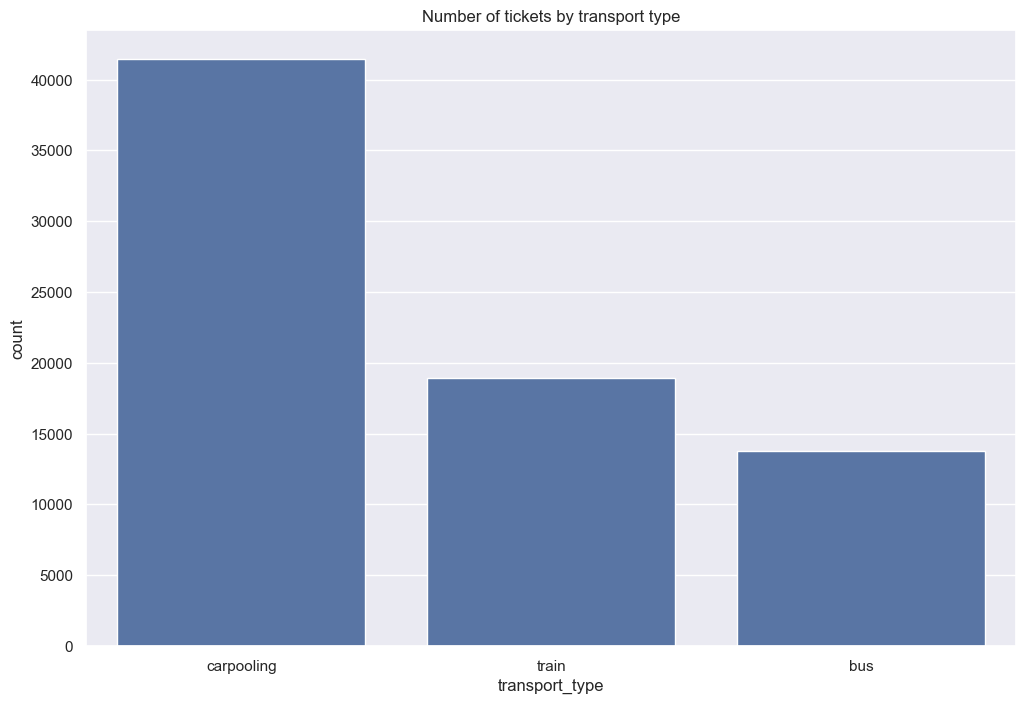

In [23]:
sns.set_theme()
plt.figure(figsize = (12,8))
plt.title('Number of tickets by transport type')
sns.countplot(data=ticket_data, x='transport_type', order = ticket_data['transport_type'].value_counts().index)
plt.show()

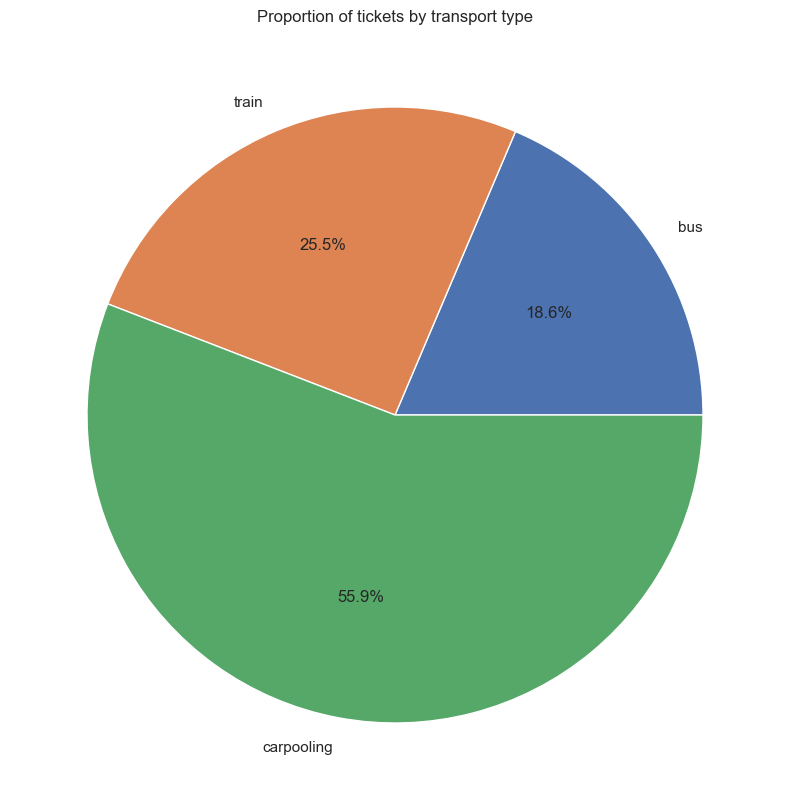

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize = (25,10))
plt.title('Proportion of tickets by transport type')
plt.pie(count_transport_type, labels= count_transport_type.index, autopct='%1.1f%%')
plt.show()

### Evolution in function of the distance

Text(0.5, 1.0, 'Price (in cent) evolution depending of some grouped distances by transport_type ')

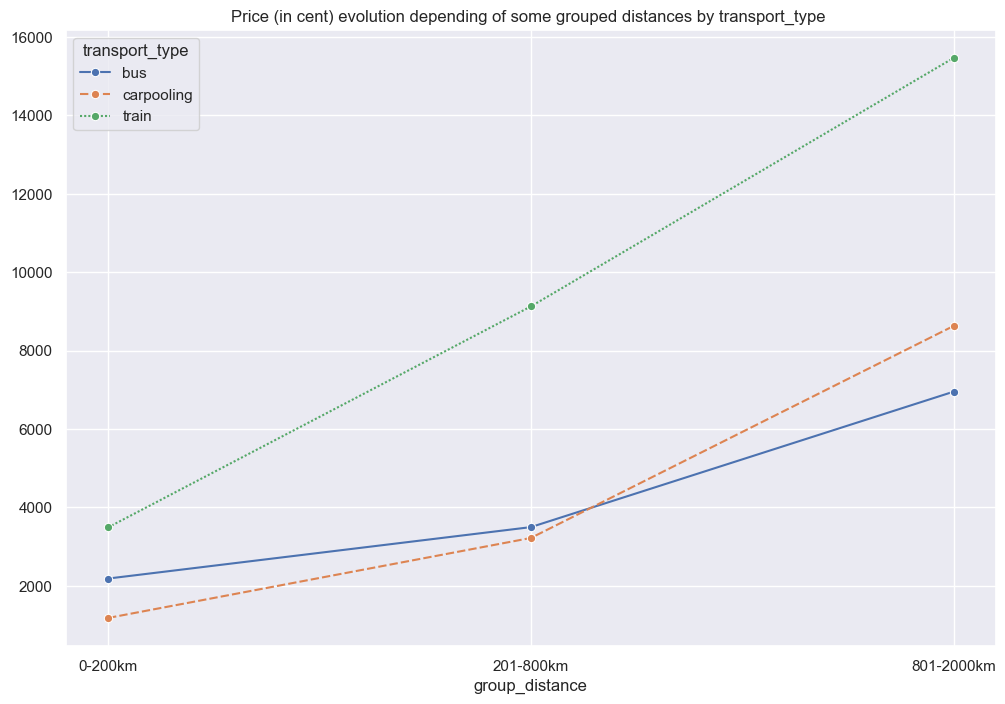

In [25]:
sns.set_theme()
plt.figure(figsize= (12,8))
sns.lineplot(mean_price_type, marker='o')
plt.title("Price (in cent) evolution depending of some grouped distances by transport_type ")

Text(0.5, 1.0, 'Duration (in hour) evolution depending of some grouped distances by transport_type ')

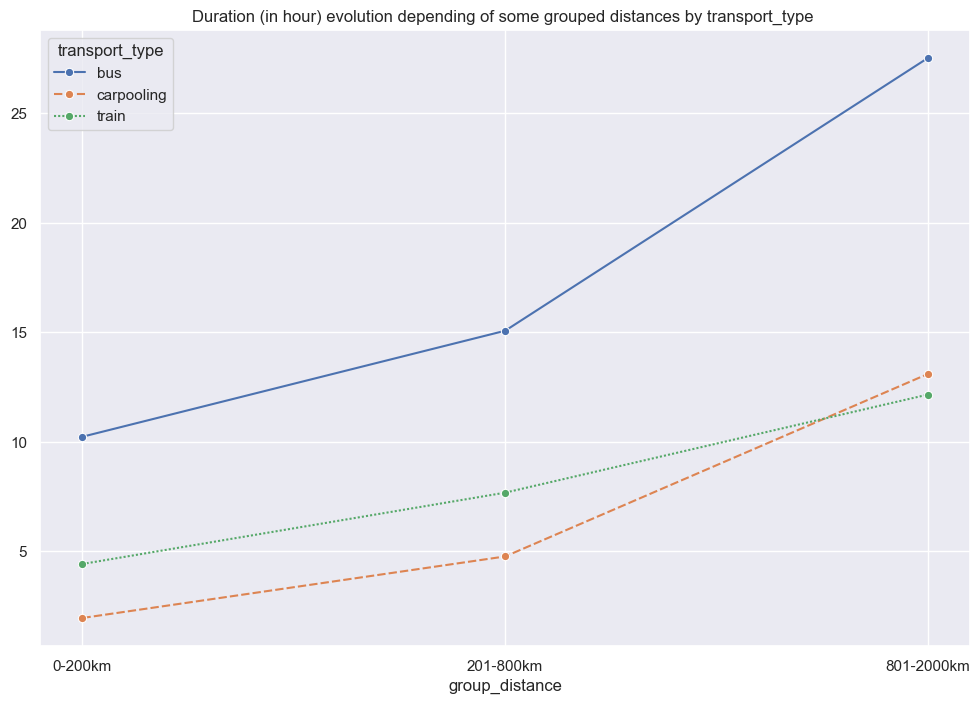

In [26]:
plt.figure(figsize= (12,8))
sns.lineplot(mean_duration_type, marker='o')
plt.title("Duration (in hour) evolution depending of some grouped distances by transport_type ")

Text(0.5, 1.0, 'Price evolution function of distance')

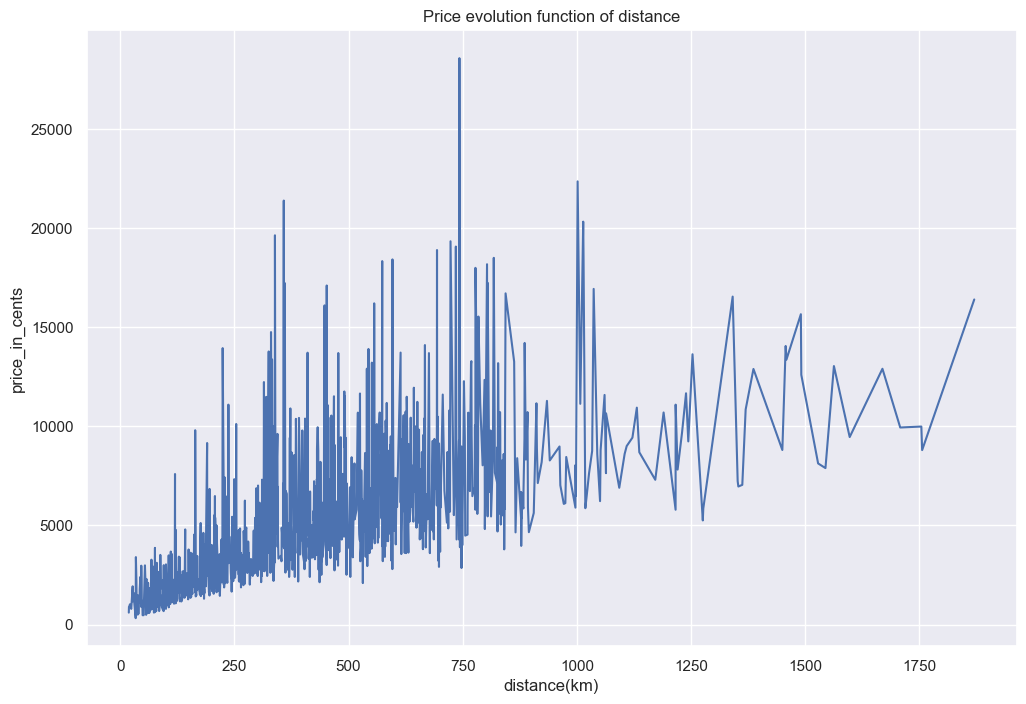

In [27]:
plt.figure(figsize= (12,8))
sns.lineplot(ticket_data, x= 'distance(km)', y= 'price_in_cents', errorbar=None)
plt.title("Price evolution function of distance")

Text(0.5, 1.0, 'Duration  evolution function of distance')

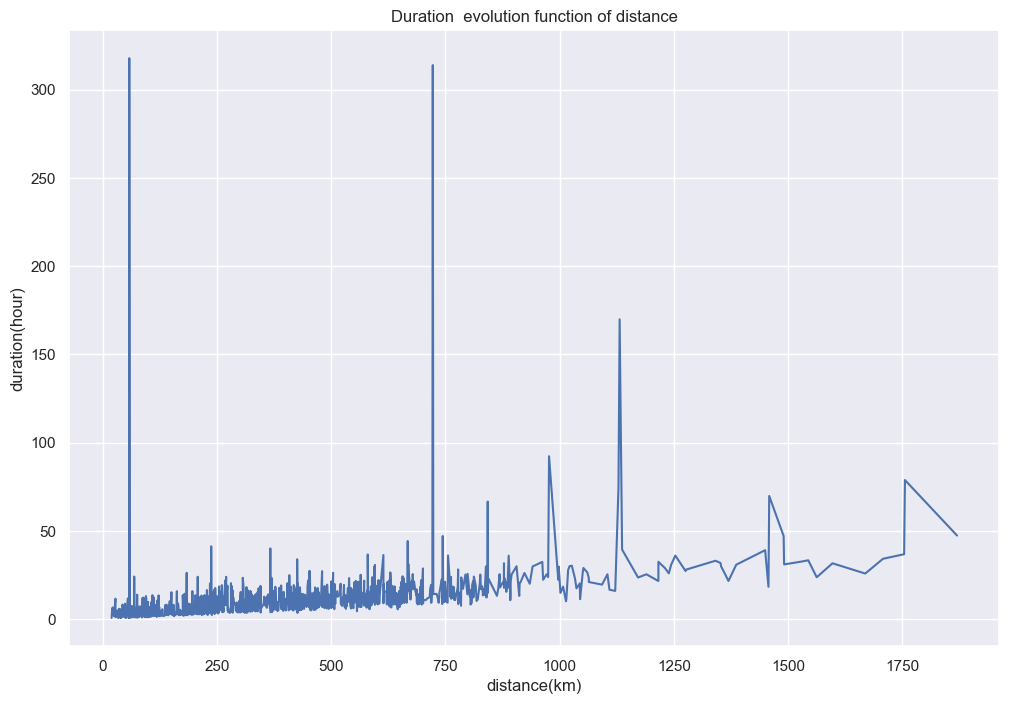

In [28]:
plt.figure(figsize= (12,8))
sns.lineplot(ticket_data, x= 'distance(km)', y= 'duration(hour)', errorbar=None)
plt.title("Duration  evolution function of distance")

### Maps

In [43]:
cities

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN
...,...,...,...,...,...,...
8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN
8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN
8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN
8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN


In [43]:
origin_cities = ticket_data.groupby(['o_station'])['id'].count().reset_index()
destination_cities = ticket_data.groupby(['d_station'])['id'].count().reset_index()
ticket_cities= origin_cities.merge(destination_cities, left_on='o_station', right_on='d_station', how= 'outer').fillna(0)
ticket_cities['count'] = ticket_cities['id_x'] + ticket_cities['id_y']
def fill_column(row):
    if row['o_station'] == 0:
        return row['d_station']
    else:
        return row['o_station']
ticket_cities['city_id'] = ticket_cities.apply(fill_column, axis=1)

all_ticket_cities = ticket_cities[['city_id', 'count']]
map_cities = all_ticket_cities.merge(cities, left_on='city_id', right_on= 'id', how='inner').sort_values('count')
map_cities

,city_id,count,id,local_name,unique_name,latitude,longitude,population
426,10995.0,1.0,10995,"Parc des Oiseaux, Auvergne-Rhône-Alpes, France",parc-des-oiseaux,45.991376,5.025320,NaN
376,5492.0,1.0,5492,"Ambronay - Priay, Auvergne-Rhône-Alpes, France",ambronay---priay,46.011650,5.338340,NaN
369,1574.0,1.0,1574,"Despotovac, Central Serbia, Serbia",despotovac,44.095470,21.436605,NaN
365,1036.0,1.0,1036,"Achim, Niedersachsen, Deutschland",achim,53.009200,9.051040,NaN
233,6744.0,1.0,6744,"Gosselming, Grand-Est, France",gosselming,48.792280,7.001720,NaN
...,...,...,...,...,...,...,...,...
236,6799.0,2063.0,6799,"Guimiliau, Bretagne, France",guimiliau,48.485110,-3.998730,NaN
212,6246.0,2107.0,6246,"Commentry, Auvergne-Rhône-Alpes, France",commentry,46.295100,2.740100,NaN
132,860.0,2184.0,860,"Udbina, Ličko-Senjska županija, Hrvatska",udbina,44.530987,15.765952,NaN
45,396.0,3526.0,396,"Klek, Grad Klek, Hrvatska",klek,45.261944,15.145278,NaN


In [66]:
fig = px.scatter_mapbox(map_cities, lat="latitude", lon="longitude", hover_name="unique_name",
                        size='count',zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                  autosize=False,
                  width=800,
                  height=600,)

fig.show()

In [64]:
import plotly.graph_objects as go


df = map_cities

fig = go.Figure(data=go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['unique_name'],
        mode = 'markers',
        marker = dict(
            size = 20,
            opacity = 0.8,
            # reversescale = True,
            autocolorscale = False,
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = [[0, 'rgb(166,206,227, 0.5)'],
                      [0.05, 'rgb(31,120,180,0.5)'],
                      [0.1, 'rgb(178,223,138,0.5)'],
                      [0.15, 'rgb(51,160,44,0.5)'],
                      [0.2, 'rgb(251,154,153,0.5)'],
                      [1, 'rgb(227,26,28,0.5)']
                     ],
            cmin = 0,
            color = df['count'],
            cmax = df['count'].max(),
            colorbar_title="Occurence of a station <br>for origin and destination"
        )))

fig.update_layout(
        title = 'Most visited stations for all tickets',
        margin=dict(l=0, r=20, t=50, b=20),
        autosize=False,
        width=1000,
        height=900,
        geo_scope='europe'
    )
fig.show()

## Machine learning prediction